# A comparision b/w XGBooster , Random Forest & Decision Tree

In [1]:
#Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the sklearn & XGBooster:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
# load the dataset:
df = sns.load_dataset("diamonds")

In [5]:
#Check the dataset:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30840 entries, 0 to 30839
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    30840 non-null  float64 
 1   cut      30840 non-null  category
 2   color    30840 non-null  category
 3   clarity  30840 non-null  category
 4   depth    30840 non-null  float64 
 5   table    30839 non-null  float64 
 6   price    30839 non-null  float64 
 7   x        30839 non-null  float64 
 8   y        30839 non-null  float64 
 9   z        30839 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 1.7 MB


<Axes: xlabel='carat', ylabel='price'>

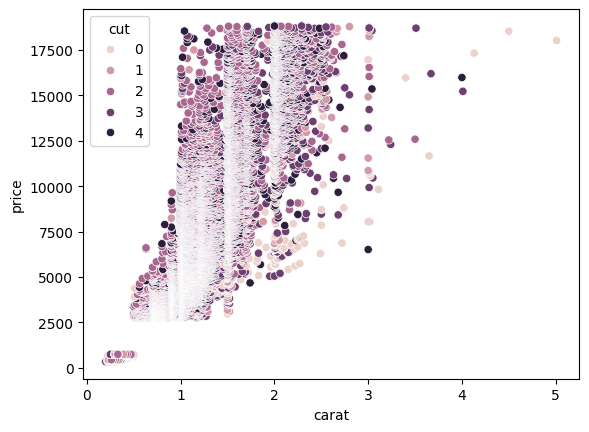

In [10]:
#Make a Scatter Plot of dataset:
sns.scatterplot(data=df, x='carat', y='price', hue='cut')

In [7]:
#Apply the label Encober for object and categorical data:
le  = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
     df[i] = le.fit_transform(df[i])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30840 entries, 0 to 30839
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    30840 non-null  float64
 1   cut      30840 non-null  int64  
 2   color    30840 non-null  int64  
 3   clarity  30840 non-null  int64  
 4   depth    30840 non-null  float64
 5   table    30839 non-null  float64
 6   price    30839 non-null  float64
 7   x        30839 non-null  float64
 8   y        30839 non-null  float64
 9   z        30839 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.4 MB


In [11]:
#Split the data into the X & y Labels:
X = df.drop('cut', axis=1)
y = df['cut']

In [12]:
#Apply the train_test_split on dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply XGBoost Algorithm

In [13]:
#Apply the model of XGBooster:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [14]:
#Predict the target value:
y_pred = model.predict(X_test)

In [17]:
#print the metrics on the y_pred & y_test:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Recall Score:", recall_score(y_test, y_pred, average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7819390402075227
Precision: 0.808777858199341
F1 Score: 0.7918974522461364
Recall Score: 0.7782485687754311
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       193
           1       0.80      0.70      0.75       593
           2       0.80      0.89      0.84      2163
           3       0.81      0.80      0.81      1766
           4       0.68      0.62      0.65      1453

    accuracy                           0.78      6168
   macro avg       0.81      0.78      0.79      6168
weighted avg       0.78      0.78      0.78      6168

Confusion Matrix: 
 [[ 170   16    4    1    2]
 [   6  415    5   17  150]
 [   1    7 1918  118  119]
 [   0    1  189 1417  159]
 [   1   82  280  187  903]]


### Apply Random Forest Algorithm:

In [18]:
#Apply the model of RandomForestClassifier:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
#Predict the target value:
y_pred = rfc.predict(X_test)

In [20]:
#print the metrics on the y_pred & y_test:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Recall Score:", recall_score(y_test, y_pred, average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7636186770428015
Precision: 0.796654230493051
F1 Score: 0.7754462724638752
Recall Score: 0.7602233501757191
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       193
           1       0.80      0.70      0.74       593
           2       0.79      0.89      0.84      2163
           3       0.77      0.80      0.78      1766
           4       0.66      0.54      0.59      1453

    accuracy                           0.76      6168
   macro avg       0.80      0.76      0.78      6168
weighted avg       0.76      0.76      0.76      6168

Confusion Matrix: 
 [[ 168   17    1    2    5]
 [   5  413    8   27  140]
 [   0    7 1923  115  118]
 [   0    1  200 1419  146]
 [   0   81  298  287  787]]


### Apply the Decision Tree Algorithm:

In [21]:
#Apply the model of DecisionTreeClassifier:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
#Predict the target value:
y_pred = dtc.predict(X_test)

In [24]:
#print the metrics on the y_pred & y_test:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Recall Score:", recall_score(y_test, y_pred, average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6973086900129701
Precision: 0.7277244821810621
F1 Score: 0.7244956660400441
Recall Score: 0.7216597638138671
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       193
           1       0.70      0.73      0.71       593
           2       0.75      0.75      0.75      2163
           3       0.73      0.72      0.73      1766
           4       0.55      0.55      0.55      1453

    accuracy                           0.70      6168
   macro avg       0.73      0.72      0.72      6168
weighted avg       0.70      0.70      0.70      6168

Confusion Matrix: 
 [[ 165   20    1    2    5]
 [   8  430   12   17  126]
 [   0   20 1621  228  294]
 [   5   22  231 1280  228]
 [   4  122  285  237  805]]


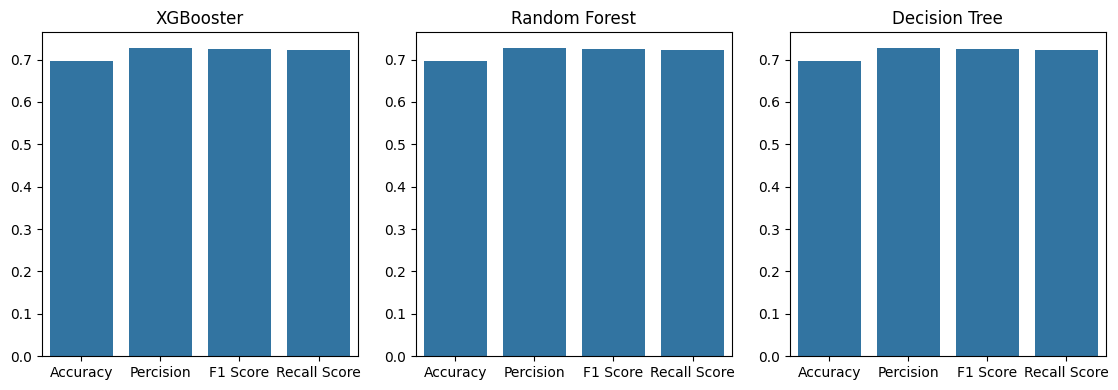

In [25]:
#Make a barplot of all Algorithms:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(x = ['Accuracy', 'Percision', 'F1 Score', 'Recall Score'],
            y = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro')])
plt.title('XGBooster')
plt.subplot(1, 4, 2)
sns.barplot(x = ['Accuracy', 'Percision', 'F1 Score', 'Recall Score'],
            y = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro')])
plt.title('Random Forest')            
plt.subplot(1, 4, 3)
sns.barplot(x = ['Accuracy', 'Percision', 'F1 Score', 'Recall Score'],
            y = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro')])
plt.title('Decision Tree')
plt.tight_layout()
plt.show()